In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/new_AR

/content/drive/My Drive/new_AR


In [ ]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
import numpy as np
from sklearn.metrics import accuracy_score
from ast import literal_eval
from collections import Counter
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
from sklearn.metrics import accuracy_score #정확도 계산

# 로지스틱 회귀분석(분류)

In [ ]:
from ast import literal_eval
data = pd.read_csv("test_data_count_0.8.csv", index_col = 0, converters = {"골프공" : literal_eval,"야구공" : literal_eval,"셔틀콕" : literal_eval,"테니스공" : literal_eval,"탁구공" : literal_eval,"푸시업바" : literal_eval,'헬스장갑' : literal_eval,'폼롤러' : literal_eval,'아령' : literal_eval,'악력기' : literal_eval,'줄넘기' : literal_eval,'요가링' : literal_eval,'체중계' : literal_eval,'원판' : literal_eval,'운동밴드' : literal_eval,'청진기' : literal_eval,'소프트젤형알약' : literal_eval,'임신테스트기' : literal_eval,'연고' : literal_eval,'밴드' : literal_eval,'주사기' : literal_eval,'인공눈물' : literal_eval,
                                '목발' : literal_eval,'천식흡입기' : literal_eval,'약병' : literal_eval,'포셉' : literal_eval,'부항컵' : literal_eval,'타블렛형알약' : literal_eval,'캡슐형알약' : literal_eval,'구급키트' : literal_eval,'부항기' : literal_eval,'벼루' : literal_eval,'포스터물감' : literal_eval,'팔레트' : literal_eval,'당구공' : literal_eval,'초크' : literal_eval,'포켓볼삼각대' : literal_eval,'치발기' : literal_eval,
                                '공갈젖꼭지' : literal_eval,'아기신발' : literal_eval,'아기손톱깎이' : literal_eval,'워터저그' : literal_eval,'아이스박스' : literal_eval,'코펠' : literal_eval,'휴대용가스버너' : literal_eval,'파이어스틱' : literal_eval,'캠핑의자' : literal_eval,'텐트팩' : literal_eval,'캠핑테이블' : literal_eval,'야전삽' : literal_eval,'전기릴선' : literal_eval,'부탄가스' : literal_eval,'손전등' : literal_eval}) # list 값 읽어오기 (csv)


In [ ]:
data = data.reset_index(drop = True)

In [ ]:
data['cate'].value_counts()

camping        1373
medical        1004
health_yoga     913
athletic        644
baby            508
art             467
pocket_ball     131
Name: cate, dtype: int64

In [ ]:
def preprocessing(df_line):
  maxx = sum(df_line)
  return maxx

In [ ]:
column_list = data.columns[:-2]

In [ ]:
for i in column_list:
    data[i] = data[i].apply(lambda a: preprocessing(a) if a!=0 else 0)

In [ ]:
import numpy as np
data = data.replace(0, np.NaN)
data = data.dropna(how = 'all')
data = data.fillna(0)
data

,골프공,야구공,셔틀콕,테니스공,탁구공,푸시업바,헬스장갑,폼롤러,아령,악력기,...,파이어스틱,캠핑의자,텐트팩,캠핑테이블,야전삽,전기릴선,부탄가스,손전등,cate,img
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,1945514_595.jpg
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,845874_595.jpg
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,2203529_595.jpg
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,2204093_595.jpg
4,0.0,0.0,0.0,0.0,0.89994,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,pocket_ball,2243011_595.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5035,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1664948_598.jpg
5036,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1664439_598.jpg
5037,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1448317_598.jpg
5038,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,baby,1512480_598.jpg


In [ ]:
from collections import Counter
Counter(data.cate)

Counter({'pocket_ball': 131,
         'health_yoga': 913,
         'art': 467,
         'camping': 1373,
         'athletic': 644,
         'medical': 1004,
         'baby': 508})

In [ ]:
X=data.iloc[:, 0:53]
print(X)

      골프공  야구공  셔틀콕  테니스공      탁구공  푸시업바  헬스장갑  폼롤러   아령  악력기  ...   코펠  \
0     0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
1     0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
2     0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
3     0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
4     0.0  0.0  0.0   0.0  0.89994   0.0   0.0  0.0  0.0  0.0  ...  0.0   
...   ...  ...  ...   ...      ...   ...   ...  ...  ...  ...  ...  ...   
5035  0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5036  0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5037  0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5038  0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   
5039  0.0  0.0  0.0   0.0  0.00000   0.0   0.0  0.0  0.0  0.0  ...  0.0   

      휴대용가스버너  파이어스틱  캠핑의자  텐트팩  캠핑테이블  야전삽  전기릴선  부탄가스  손전등  
0         0.0    0.0   0.0  0.0    0

In [ ]:
y=data['cate'].tolist()

In [ ]:
from sklearn.model_selection import train_test_split

RANDOM_SEED=42
TEST_SPLIT=0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SPLIT, shuffle=True, random_state=RANDOM_SEED)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

'''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
# 데이터에 정규화 적용
# 평균이 0이고 표준편차가 1인 분포를 따르도록 함
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
'''

'\nfrom sklearn.preprocessing import StandardScaler\n\nsc = StandardScaler()\n# 데이터에 정규화 적용\n# 평균이 0이고 표준편차가 1인 분포를 따르도록 함\nX_train = sc.fit_transform(X_train)\nX_test = sc.transform(X_test)\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lgs=LogisticRegression(class_weight='balanced')
parameters  = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(lgs, parameters, cv=3, n_jobs=-1, scoring="accuracy")
grid_search.fit(X_train, y_train)
#predicted = grid_search.predict(X_test)
#lgs.fit(X_train, y_train)

best = grid_search.best_estimator_
print(best)

LogisticRegression(C=100, class_weight='balanced')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import joblib
joblib.dump(grid_search , 'lgs_best_gs.pkl')

['lgs_best_gs.pkl']

Accuracy: 0.810516
precision:  0.8284601447027757
recall:  0.810515873015873
f1score:  0.8086220925064856


LogisticRegression(C=100, class_weight='balanced')

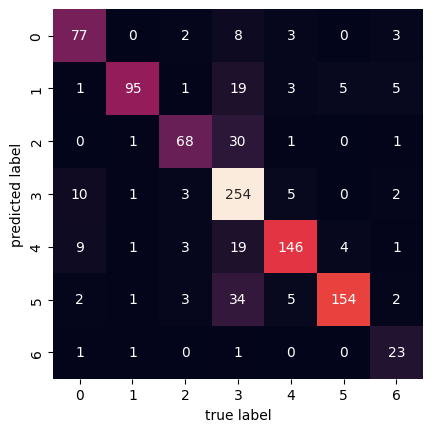

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
best = grid_search.best_estimator_

y_predict=best.predict(X_test)
#score = cross_val_score(lgs, X_test, y_test, cv=5)
mat = confusion_matrix(y_predict, y_test)
precision = precision_score(y_predict, y_test, average = 'weighted')
recall = recall_score(y_predict, y_test, average = 'weighted')
f1score = f1_score(y_predict, y_test, average= 'weighted')
print("Accuracy: {:f}".format(grid_search.score(X_test, y_test)))
print('precision: ', precision)
print('recall: ', recall)
print('f1score: ', f1score)
#print('5-fold_validation score: ',score.mean())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
grid_search.best_estimator_

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# RBF 기반 SVM모델을 튜닝한다
from sklearn.model_selection import GridSearchCV
import timeit
svc         = SVC(kernel='rbf')
parameters  = {'C':(100, 1e3, 1e4, 1e5),
               'gamma':(1e-8, 1e-7, 1e-6, 1e-5)}
grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=3)
start_time  = timeit.default_timer()
grid_search.fit(X_train, y_train)
print("--- %0.3fs seconds ---" % (timeit.default_timer() - start_time))
print(grid_search.best_params_)
print(grid_search.best_score_)

# 최적화된 모델의 파라미터를 출력
svc_best = grid_search.best_estimator_
svc_best

--- 49.571s seconds ---
{'C': 100000.0, 'gamma': 1e-05}
0.8120039682539683


SVC(C=100000.0, gamma=1e-05)

In [ ]:
# 개별 클래스멸 성능을 측정한다
from sklearn.metrics import classification_report
prediction = svc_best.predict(X_test)#, Y_test)
report     = classification_report(y_test, prediction)
print(report)

              precision    recall  f1-score   support

         art       0.70      0.84      0.76        93
    athletic       0.90      0.77      0.83       129
        baby       0.79      0.67      0.73       101
     camping       0.71      0.89      0.79       275
 health_yoga       0.86      0.80      0.83       183
     medical       0.94      0.75      0.83       201
 pocket_ball       0.80      0.77      0.78        26

    accuracy                           0.80      1008
   macro avg       0.81      0.78      0.79      1008
weighted avg       0.82      0.80      0.80      1008



Accuracy: 0.800595
precision:  0.8128774187400686
recall:  0.8005952380952381
f1score:  0.7992870428084504
5-fold_validation score:  0.8115072519917226


Text(113.9222222222222, 0.5, 'predicted label')

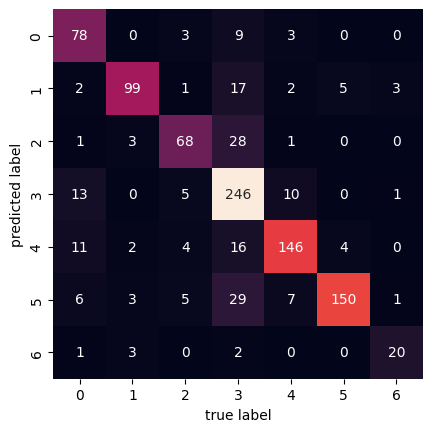

In [ ]:
score = cross_val_score(svc_best, X_train, y_train, cv=5)
mat = confusion_matrix(prediction, y_test)
precision = precision_score(prediction, y_test, average = 'weighted')
recall = recall_score(prediction, y_test, average = 'weighted')
f1score = f1_score(prediction, y_test, average= 'weighted')
print("Accuracy: {:f}".format(svc_best.score(X_test, y_test)))
print('precision: ', precision)
print('recall: ', recall)
print('f1score: ', f1score)
print('5-fold_validation score: ',score.mean())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
from sklearn.preprocessing import MinMaxScaler #fixed import

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB # 다항분포 나이브 베이즈 모델
import numpy as np
from sklearn.metrics import accuracy_score #정확도 계산
mod = MultinomialNB()
parameters  = {'alpha':np.linspace(0.01, 1, 100)}
grid_search = GridSearchCV(mod, parameters, scoring = "accuracy", cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)
predicted = grid_search.predict(X_test)

report     = classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

         art       0.76      0.82      0.79        93
    athletic       0.91      0.74      0.82       129
        baby       0.82      0.68      0.75       101
     camping       0.70      0.91      0.79       275
 health_yoga       0.86      0.80      0.83       183
     medical       0.87      0.78      0.82       201
 pocket_ball       1.00      0.50      0.67        26

    accuracy                           0.80      1008
   macro avg       0.85      0.75      0.78      1008
weighted avg       0.81      0.80      0.80      1008



Accuracy: 0.797619
precision:  0.8143656120150267
recall:  0.7976190476190477
f1score:  0.7977515034560626
5-fold_validation score:  0.7948930112139129


Text(113.9222222222222, 0.5, 'predicted label')

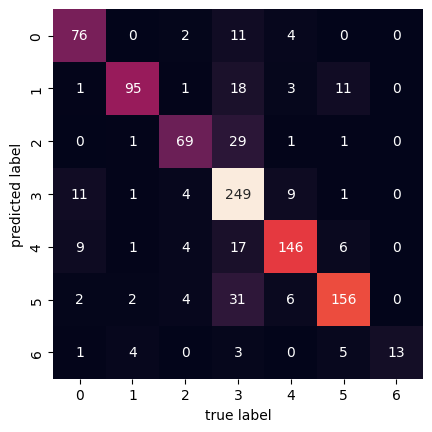

In [ ]:
score = cross_val_score(mod, X_train, y_train, cv=5)
mat = confusion_matrix(predicted, y_test)
precision = precision_score(predicted, y_test, average = 'weighted')
recall = recall_score(predicted, y_test, average = 'weighted')
f1score = f1_score(predicted, y_test, average= 'weighted')
print("Accuracy: {:f}".format(grid_search.score(X_test, y_test)))
print('precision: ', precision)
print('recall: ', recall)
print('f1score: ', f1score)
print('5-fold_validation score: ',score.mean())
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# 로지스틱회귀 임계값정하기

In [ ]:
def lr(filename):
  result = []
  data = pd.read_csv(filename, index_col = 0, converters = {"골프공" : literal_eval,"야구공" : literal_eval,"셔틀콕" : literal_eval,"테니스공" : literal_eval,"탁구공" : literal_eval,"푸시업바" : literal_eval,'헬스장갑' : literal_eval,'폼롤러' : literal_eval,'아령' : literal_eval,'악력기' : literal_eval,'줄넘기' : literal_eval,'요가링' : literal_eval,'체중계' : literal_eval,'원판' : literal_eval,'운동밴드' : literal_eval,'청진기' : literal_eval,'소프트젤형알약' : literal_eval,'임신테스트기' : literal_eval,'연고' : literal_eval,'밴드' : literal_eval,'주사기' : literal_eval,'인공눈물' : literal_eval,
                                  '목발' : literal_eval,'천식흡입기' : literal_eval,'약병' : literal_eval,'포셉' : literal_eval,'부항컵' : literal_eval,'타블렛형알약' : literal_eval,'캡슐형알약' : literal_eval,'구급키트' : literal_eval,'부항기' : literal_eval,'벼루' : literal_eval,'포스터물감' : literal_eval,'팔레트' : literal_eval,'당구공' : literal_eval,'초크' : literal_eval,'포켓볼삼각대' : literal_eval,'치발기' : literal_eval,
                                  '공갈젖꼭지' : literal_eval,'아기신발' : literal_eval,'아기손톱깎이' : literal_eval,'워터저그' : literal_eval,'아이스박스' : literal_eval,'코펠' : literal_eval,'휴대용가스버너' : literal_eval,'파이어스틱' : literal_eval,'캠핑의자' : literal_eval,'텐트팩' : literal_eval,'캠핑테이블' : literal_eval,'야전삽' : literal_eval,'전기릴선' : literal_eval,'부탄가스' : literal_eval,'손전등' : literal_eval}) # list 값 읽어오기 (csv)
  column_list = data.columns[:-2]
  for i in column_list:
    data[i] = data[i].apply(lambda a: preprocessing(a) if a!=0 else 0)
  data = data.replace(0, np.NaN)
  data = data.dropna(how = 'all')
  data = data.fillna(0)
  X=data.iloc[:, 0:53]
  y=data['cate'].tolist()
  RANDOM_SEED=42
  TEST_SPLIT=0.2
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SPLIT, shuffle=True, random_state=RANDOM_SEED)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  lgs=LogisticRegression(class_weight='balanced', max_iter = 500)
  parameters  = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
  grid_search = GridSearchCV(lgs, parameters, cv=3, n_jobs=-1, scoring="accuracy")
  grid_search.fit(X_train, y_train)
  y_predict=grid_search.predict(X_test)
  precision = precision_score(y_predict, y_test, average = 'weighted')
  recall = recall_score(y_predict, y_test, average = 'weighted')
  f1score = f1_score(y_predict, y_test, average= 'weighted')
  result.append(grid_search.score(X_test, y_test))
  result.append(precision)
  result.append(recall)
  result.append(f1score)
  return result

In [ ]:
from tqdm import tqdm
t = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
filename = ["test_data_count90_"+str(i)+".csv" for i in t]
a = []
for i in tqdm(filename):
  a.append([i, lr(i)])
a

 93%|█████████▎| 14/15 [01:24<00:05,  5.86s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 15/15 [01:27<00:00,  5.85s/it]


[['test_data_count90_0.25.csv',
  [0.7162698412698413,
   0.7394390535249042,
   0.7162698412698413,
   0.7151181423334081]],
 ['test_data_count90_0.3.csv',
  [0.7162698412698413,
   0.7394390535249042,
   0.7162698412698413,
   0.7151181423334081]],
 ['test_data_count90_0.35.csv',
  [0.7162698412698413,
   0.7394390535249042,
   0.7162698412698413,
   0.7151181423334081]],
 ['test_data_count90_0.4.csv',
  [0.7222222222222222,
   0.7485861168554507,
   0.7222222222222222,
   0.7213466616595653]],
 ['test_data_count90_0.45.csv',
  [0.7232142857142857,
   0.7505408724658449,
   0.7232142857142857,
   0.7221951413448654]],
 ['test_data_count90_0.5.csv',
  [0.7261904761904762,
   0.7546121725687597,
   0.7261904761904762,
   0.7250210003847349]],
 ['test_data_count90_0.55.csv',
  [0.7271825396825397,
   0.7562280620164841,
   0.7271825396825397,
   0.7260317686579998]],
 ['test_data_count90_0.6.csv',
  [0.7301587301587301,
   0.7613305609147852,
   0.7301587301587301,
   0.7288389936702722

0.7450396825396826


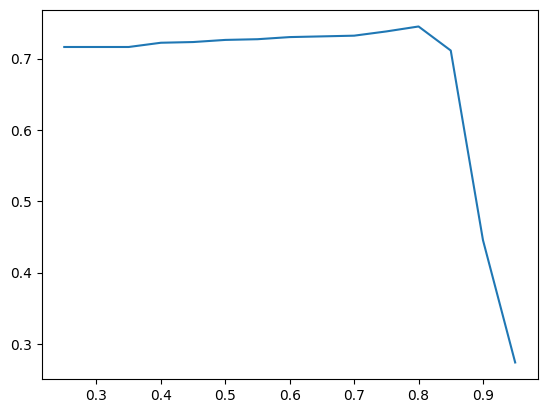

In [ ]:
import matplotlib.pyplot as plt
acc = []
for i in a:
  acc.append(i[1][0])
print(max(acc))
plt.plot(t,acc)
plt.show()

# SVM

In [ ]:
def svm(filename):
  result = []
  data = pd.read_csv(filename, index_col = 0, converters = {"골프공" : literal_eval,"야구공" : literal_eval,"셔틀콕" : literal_eval,"테니스공" : literal_eval,"탁구공" : literal_eval,"푸시업바" : literal_eval,'헬스장갑' : literal_eval,'폼롤러' : literal_eval,'아령' : literal_eval,'악력기' : literal_eval,'줄넘기' : literal_eval,'요가링' : literal_eval,'체중계' : literal_eval,'원판' : literal_eval,'운동밴드' : literal_eval,'청진기' : literal_eval,'소프트젤형알약' : literal_eval,'임신테스트기' : literal_eval,'연고' : literal_eval,'밴드' : literal_eval,'주사기' : literal_eval,'인공눈물' : literal_eval,
                                  '목발' : literal_eval,'천식흡입기' : literal_eval,'약병' : literal_eval,'포셉' : literal_eval,'부항컵' : literal_eval,'타블렛형알약' : literal_eval,'캡슐형알약' : literal_eval,'구급키트' : literal_eval,'부항기' : literal_eval,'벼루' : literal_eval,'포스터물감' : literal_eval,'팔레트' : literal_eval,'당구공' : literal_eval,'초크' : literal_eval,'포켓볼삼각대' : literal_eval,'치발기' : literal_eval,
                                  '공갈젖꼭지' : literal_eval,'아기신발' : literal_eval,'아기손톱깎이' : literal_eval,'워터저그' : literal_eval,'아이스박스' : literal_eval,'코펠' : literal_eval,'휴대용가스버너' : literal_eval,'파이어스틱' : literal_eval,'캠핑의자' : literal_eval,'텐트팩' : literal_eval,'캠핑테이블' : literal_eval,'야전삽' : literal_eval,'전기릴선' : literal_eval,'부탄가스' : literal_eval,'손전등' : literal_eval}) # list 값 읽어오기 (csv)
  column_list = data.columns[:-2]
  for i in column_list:
    data[i] = data[i].apply(lambda a: preprocessing(a) if a!=0 else 0)
  data = data.replace(0, np.NaN)
  data = data.dropna(how = 'all')
  data = data.fillna(0)
  X=data.iloc[:, 0:53]
  y=data['cate'].tolist()
  RANDOM_SEED=42
  TEST_SPLIT=0.2
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SPLIT, shuffle=True, random_state=RANDOM_SEED)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  svc         = SVC(kernel='rbf')
  parameters  = {'C':(100, 1e3, 1e4, 1e5),
                'gamma':(1e-8, 1e-7, 1e-6, 1e-5)}
  grid_search = GridSearchCV(svc, parameters, n_jobs=-1, cv=3)
  grid_search.fit(X_train, y_train)
  y_predict = grid_search.predict(X_test)
  precision = precision_score(y_predict, y_test, average = 'weighted')
  recall = recall_score(y_predict, y_test, average = 'weighted')
  f1score = f1_score(y_predict, y_test, average= 'weighted')
  result.append(grid_search.score(X_test, y_test))
  result.append(precision)
  result.append(recall)
  result.append(f1score)
  return result

In [ ]:
from tqdm import tqdm
t = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
filename = ["test_data_count90_"+str(i)+".csv" for i in t]
a = []
for i in tqdm(filename):
  a.append([i, svm(i)])
a

 93%|█████████▎| 14/15 [10:23<00:44, 44.34s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 15/15 [11:06<00:00, 44.42s/it]


[['test_data_count90_0.25.csv',
  [0.7113095238095238,
   0.7454061189821531,
   0.7113095238095238,
   0.7123062861456635]],
 ['test_data_count90_0.3.csv',
  [0.7123015873015873,
   0.7462698407999352,
   0.7123015873015873,
   0.7132120029064776]],
 ['test_data_count90_0.35.csv',
  [0.7123015873015873,
   0.7462698407999352,
   0.7123015873015873,
   0.7132120029064776]],
 ['test_data_count90_0.4.csv',
  [0.7132936507936508,
   0.7467457686952179,
   0.7132936507936508,
   0.7141118571364269]],
 ['test_data_count90_0.45.csv',
  [0.7123015873015873,
   0.745581407755206,
   0.7123015873015873,
   0.7132307015483699]],
 ['test_data_count90_0.5.csv',
  [0.7152777777777778,
   0.7500870140912761,
   0.7152777777777778,
   0.716081779117207]],
 ['test_data_count90_0.55.csv',
  [0.7152777777777778,
   0.7499922287571862,
   0.7152777777777778,
   0.7160365333633001]],
 ['test_data_count90_0.6.csv',
  [0.7222222222222222,
   0.7589538762013769,
   0.7222222222222222,
   0.7224924045812603]]

0.7351190476190477


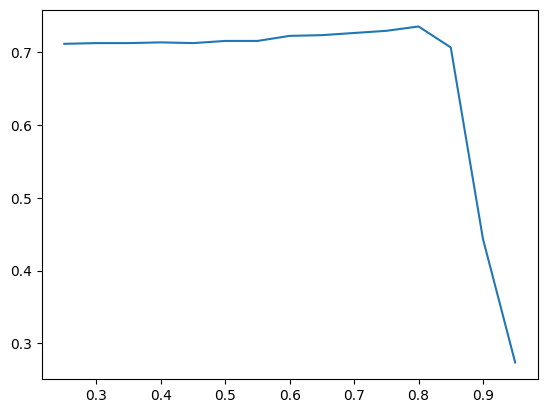

In [ ]:
import matplotlib.pyplot as plt
acc = []
for i in a:
  acc.append(i[1][0])
print(max(acc))
plt.plot(t,acc)
plt.show()

# 나이브 베이즈

In [ ]:
def nb(filename):
  result = []
  data = pd.read_csv(filename, index_col = 0, converters = {"골프공" : literal_eval,"야구공" : literal_eval,"셔틀콕" : literal_eval,"테니스공" : literal_eval,"탁구공" : literal_eval,"푸시업바" : literal_eval,'헬스장갑' : literal_eval,'폼롤러' : literal_eval,'아령' : literal_eval,'악력기' : literal_eval,'줄넘기' : literal_eval,'요가링' : literal_eval,'체중계' : literal_eval,'원판' : literal_eval,'운동밴드' : literal_eval,'청진기' : literal_eval,'소프트젤형알약' : literal_eval,'임신테스트기' : literal_eval,'연고' : literal_eval,'밴드' : literal_eval,'주사기' : literal_eval,'인공눈물' : literal_eval,
                                  '목발' : literal_eval,'천식흡입기' : literal_eval,'약병' : literal_eval,'포셉' : literal_eval,'부항컵' : literal_eval,'타블렛형알약' : literal_eval,'캡슐형알약' : literal_eval,'구급키트' : literal_eval,'부항기' : literal_eval,'벼루' : literal_eval,'포스터물감' : literal_eval,'팔레트' : literal_eval,'당구공' : literal_eval,'초크' : literal_eval,'포켓볼삼각대' : literal_eval,'치발기' : literal_eval,
                                  '공갈젖꼭지' : literal_eval,'아기신발' : literal_eval,'아기손톱깎이' : literal_eval,'워터저그' : literal_eval,'아이스박스' : literal_eval,'코펠' : literal_eval,'휴대용가스버너' : literal_eval,'파이어스틱' : literal_eval,'캠핑의자' : literal_eval,'텐트팩' : literal_eval,'캠핑테이블' : literal_eval,'야전삽' : literal_eval,'전기릴선' : literal_eval,'부탄가스' : literal_eval,'손전등' : literal_eval}) # list 값 읽어오기 (csv)
  column_list = data.columns[:-2]
  for i in column_list:
    data[i] = data[i].apply(lambda a: preprocessing(a) if a!=0 else 0)
  data = data.replace(0, np.NaN)
  data = data.dropna(how = 'all')
  data = data.fillna(0)
  X=data.iloc[:, 0:53]
  y=data['cate'].tolist()
  RANDOM_SEED=42
  TEST_SPLIT=0.2
  X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=TEST_SPLIT, shuffle=True, random_state=RANDOM_SEED)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)
  mod = MultinomialNB()
  parameters  = {'alpha':np.linspace(0.01, 1, 100)}
  grid_search = GridSearchCV(mod, parameters, scoring = "accuracy", cv=3, n_jobs=-1)
  grid_search.fit(X_train, y_train)
  y_predict = grid_search.predict(X_test)
  precision = precision_score(y_predict, y_test, average = 'weighted')
  recall = recall_score(y_predict, y_test, average = 'weighted')
  f1score = f1_score(y_predict, y_test, average= 'weighted')
  result.append(grid_search.score(X_test, y_test))
  result.append(precision)
  result.append(recall)
  result.append(f1score)
  return result

In [ ]:
from tqdm import tqdm
t = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
filename = ["test_data_count90_"+str(i)+".csv" for i in t]
a = []
for i in tqdm(filename):
  a.append([i, nb(i)])
a

 93%|█████████▎| 14/15 [01:00<00:04,  4.39s/it]/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 15/15 [01:04<00:00,  4.31s/it]


[['test_data_count90_0.25.csv',
  [0.7023809523809523,
   0.7464470947675377,
   0.7023809523809523,
   0.7053328696858141]],
 ['test_data_count90_0.3.csv',
  [0.7013888888888888,
   0.7448665039127532,
   0.7013888888888888,
   0.7042411191892466]],
 ['test_data_count90_0.35.csv',
  [0.6994047619047619,
   0.7424336401051707,
   0.6994047619047619,
   0.701966862538319]],
 ['test_data_count90_0.4.csv',
  [0.7013888888888888,
   0.7500613853902949,
   0.7013888888888888,
   0.7052837903557991]],
 ['test_data_count90_0.45.csv',
  [0.7033730158730159,
   0.7487432896871933,
   0.7033730158730159,
   0.7060433064669456]],
 ['test_data_count90_0.5.csv',
  [0.7063492063492064,
   0.7537128380729486,
   0.7063492063492064,
   0.70858165524688]],
 ['test_data_count90_0.55.csv',
  [0.7093253968253969,
   0.7564703475689561,
   0.7093253968253969,
   0.7119028137978688]],
 ['test_data_count90_0.6.csv',
  [0.7172619047619048,
   0.76686367674586,
   0.7172619047619048,
   0.7190088852125731]],
 

0.7301587301587301


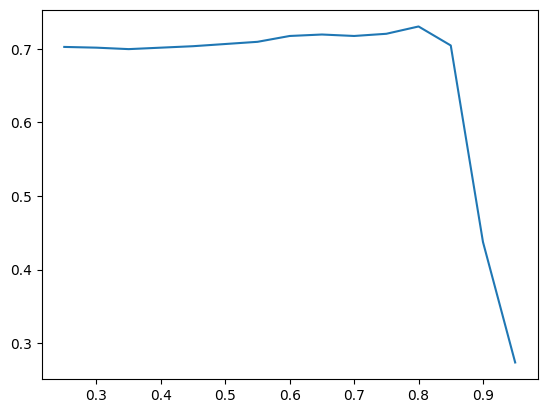

In [ ]:
import matplotlib.pyplot as plt
acc = []
for i in a:
  acc.append(i[1][0])
print(max(acc))
plt.plot(t,acc)
plt.show()